I'm a long distance runner in my personal life, and in 2019, I ran for Reykjavik Marathon. 

I was aiming to run it in under 3 hours (known as "sub-3"), but I failed and ended up being a sub-4 runner for the marathon.
I was on a good pace even after the half point, but somewhere around 30k, I got cramps and lost speed.
As a tendency, do sub-3 runners maintain the same-level speed all the way through?
Or do they also have a slower pace after around the same point as I did? I'd love to check in order to become a stronger runner with some insights!

In Reykjavik Marathon, they record split times at 29.4k. Let's check if the average running speed is significantly different before and after this point. 

- Null hypothesis 1: The difference between the average running speed before and after 29.4k among the sub-3 runners is zero.
- Althernative hypothesis 1: The average running speed before and after 29.4k among the sub-3 runners is different.　
- α: 0.05


- Null hypothesis 2: The difference between the average running speed before and after 29.4k among the sub-4 runners is zero.
- Althernative hypothesis 2: The average running speed before and after 29.4k among the sub-4 runners is different.　
- α: 0.05

## Data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

url = 'https://timataka.net/reykjavikurmarathon2019/urslit/?race=1&cat=overall' # Results from Reykjavik Marathon 2019
df_lists = pd.io.html.read_html(url)
df_lists

[      Rank   BIB                        Name Unnamed: 3   YOB Nat.  \
 0        1  1200             Arnar Pétursson          M  1991  ISL   
 1        2  1700            Brian Petrocelli          M  1977  USA   
 2        3   403               Drake Vidrine          M  1974  USA   
 3        4   399    Sigurjón Ernir Sturluson          M  1990  ISL   
 4        5   417         GEORGIOS TSIGERIDIS          M  1982  GRC   
 ...    ...   ...                         ...        ...   ...  ...   
 1168  1169  1528            MARCELLINO ISOLI          M  1958  ITA   
 1169  1170  1380  Puttachart Charapattanakul          F  1967  THA   
 1170  1171  1702                 Frank Smits          M  1965  NLD   
 1171  1172  1002        Nancy Anne Calderone          F  1991  USA   
 1172  1173   360  Áslaug Heiða Gunnarsdóttir          F  1983  ISL   
 
                          Club  \
 0                          ÍR   
 1                         NaN   
 2           Kansas City Smoke   
 3        

In [2]:
# Extract the sub-3 and sub-4 runners only
target_runners = df_lists[0][df_lists[0]['Time']<'04:00:00']
target_runners

,Rank,BIB,Name,Unnamed: 3,YOB,Nat.,Club,Split,Time,Behind,Chiptime
0,1,1200,Arnar Pétursson,M,1991,ISL,ÍR,"00:16:45 (5 km)00:33:32 (10 km)00:54:24 (16,4 ...",02:23:08,NaN,02:23:07
1,2,1700,Brian Petrocelli,M,1977,USA,NaN,"00:18:55 (5 km)00:37:25 (10 km)01:00:11 (16,4 ...",02:38:20,+15:12,02:38:16
2,3,403,Drake Vidrine,M,1974,USA,Kansas City Smoke,"00:19:37 (5 km)00:38:47 (10 km)01:02:36 (16,4 ...",02:44:45,+21:37,02:44:41
3,4,399,Sigurjón Ernir Sturluson,M,1990,ISL,2XU / On Running,"00:19:41 (5 km)00:39:22 (10 km)01:03:44 (16,4 ...",02:45:40,+22:32,02:45:38
4,5,417,GEORGIOS TSIGERIDIS,M,1982,GRC,AGS NEAS IONIAS ANATOLI,"00:19:16 (5 km)00:38:20 (10 km)01:02:13 (16,4 ...",02:47:08,+24:00,02:47:07
...,...,...,...,...,...,...,...,...,...,...,...
450,451,1202,Scott Jarvis,M,1984,GBR,Altrincham,"00:32:23 (5 km)01:00:04 (10 km)01:32:48 (16,4 ...",03:59:46,+01:36:38,03:56:52
451,452,1521,Torben Immisch,M,1969,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:44 (10 km)01:30:53 (16,4 ...",03:59:48,+01:36:40,03:58:07
452,453,1131,Adam Naser,M,1979,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:45 (10 km)01:30:54 (16,4 ...",03:59:49,+01:36:41,03:58:08
453,454,754,Stefan Dr. Sattler,M,1965,DEU,Sportlich-Team Bornheim,"00:30:01 (5 km)00:57:57 (10 km)01:33:13 (16,4 ...",03:59:54,+01:36:46,03:58:14


## Data cleansing

It looks from the race result page that a few runners missed some internal records. I would like to omit rows with such data to compare records on the same ground. The correct number of intermediate results in this case is 6 (5 km, 10km, 16.4 km, 21.1km, 29.4 km, 38 km).　I will use the regular expression ```\([0-9]*\skm\)| \([0-9]*,[0-9]*\skm\``` to omit the "(x km)" parts. It will split each record in "Split" 6 times, which will make the number of elements 7, with a space at the end.

In [3]:
import re

ir_list = []
reg = ' \([0-9]*\skm\)| \([0-9]*,[0-9]*\skm\)'

# Find out the BIBs of irregular records
for count, value in enumerate(target_runners['Split']):
    splits = re.split(reg, value)
    if len(splits) != 7:
        ir_list.append(target_runners.loc[count]['BIB'])
print(ir_list)

[283, 632, 468]


In [4]:
 # Omit the irregular data
cleansed_df = target_runners[~target_runners['BIB'].isin(ir_list)]
cleansed_df

,Rank,BIB,Name,Unnamed: 3,YOB,Nat.,Club,Split,Time,Behind,Chiptime
0,1,1200,Arnar Pétursson,M,1991,ISL,ÍR,"00:16:45 (5 km)00:33:32 (10 km)00:54:24 (16,4 ...",02:23:08,NaN,02:23:07
1,2,1700,Brian Petrocelli,M,1977,USA,NaN,"00:18:55 (5 km)00:37:25 (10 km)01:00:11 (16,4 ...",02:38:20,+15:12,02:38:16
2,3,403,Drake Vidrine,M,1974,USA,Kansas City Smoke,"00:19:37 (5 km)00:38:47 (10 km)01:02:36 (16,4 ...",02:44:45,+21:37,02:44:41
3,4,399,Sigurjón Ernir Sturluson,M,1990,ISL,2XU / On Running,"00:19:41 (5 km)00:39:22 (10 km)01:03:44 (16,4 ...",02:45:40,+22:32,02:45:38
4,5,417,GEORGIOS TSIGERIDIS,M,1982,GRC,AGS NEAS IONIAS ANATOLI,"00:19:16 (5 km)00:38:20 (10 km)01:02:13 (16,4 ...",02:47:08,+24:00,02:47:07
...,...,...,...,...,...,...,...,...,...,...,...
450,451,1202,Scott Jarvis,M,1984,GBR,Altrincham,"00:32:23 (5 km)01:00:04 (10 km)01:32:48 (16,4 ...",03:59:46,+01:36:38,03:56:52
451,452,1521,Torben Immisch,M,1969,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:44 (10 km)01:30:53 (16,4 ...",03:59:48,+01:36:40,03:58:07
452,453,1131,Adam Naser,M,1979,DNK,Mikkeller Running Club,"00:29:29 (5 km)00:56:45 (10 km)01:30:54 (16,4 ...",03:59:49,+01:36:41,03:58:08
453,454,754,Stefan Dr. Sattler,M,1965,DEU,Sportlich-Team Bornheim,"00:30:01 (5 km)00:57:57 (10 km)01:33:13 (16,4 ...",03:59:54,+01:36:46,03:58:14


In [5]:
#　Split the intermediate　records by each record point
cleansed_splits = cleansed_df['Split'].str.split(reg)
cleansed_splits

0      [00:16:45, 00:33:32, 00:54:24, 01:11:21, 01:39...
1      [00:18:55, 00:37:25, 01:00:11, 01:18:45, 01:50...
2      [00:19:37, 00:38:47, 01:02:36, 01:21:42, 01:54...
3      [00:19:41, 00:39:22, 01:03:44, 01:23:15, 01:55...
4      [00:19:16, 00:38:20, 01:02:13, 01:21:42, 01:54...
                             ...                        
450    [00:32:23, 01:00:04, 01:32:48, 01:58:16, 02:41...
451    [00:29:29, 00:56:44, 01:30:53, 01:58:15, 02:45...
452    [00:29:29, 00:56:45, 01:30:54, 01:58:15, 02:45...
453    [00:30:01, 00:57:57, 01:33:13, 02:00:38, 02:47...
454    [00:31:49, 01:00:01, 01:34:41, 02:02:24, 02:49...
Name: Split, Length: 452, dtype: object

In [6]:
# Function to convert each time record to seconds
def time_to_second(ls):
    seconds = []
    for i in ls:
        t = pd.to_datetime(i)
        t = (t.hour * 60 + t.minute) * 60 + t.second
        seconds.append(t)
    return seconds

In [7]:
splits_in_sec = time_to_second(cleansed_splits)
fin_in_sec = time_to_second(cleansed_df['Time'])

Now I'm ready to put split times and finish times into a table.

In [8]:
# Create a table to put all the results in
name = ['5k', '10k', '16.4k', '21.1k', '29.4k','38k']

record_box = []

# Put the running records into the new table
for i in splits_in_sec:
    record_box.append(i[:-1])

runners_df = pd.DataFrame(record_box, columns = name)
runners_df['42.195k'] = fin_in_sec
runners_df

,5k,10k,16.4k,21.1k,29.4k,38k,42.195k
0,1005.0,2012.0,3264.0,4281.0,5966.0,7746.0,8588
1,1135.0,2245.0,3611.0,4725.0,6602.0,8566.0,9500
2,1177.0,2327.0,3756.0,4902.0,6850.0,8880.0,9885
3,1181.0,2362.0,3824.0,4995.0,6944.0,8979.0,9940
4,1156.0,2300.0,3733.0,4902.0,6849.0,8977.0,10028
...,...,...,...,...,...,...,...
447,1943.0,3604.0,5568.0,7096.0,9663.0,12958.0,14386
448,1769.0,3404.0,5453.0,7095.0,9904.0,13002.0,14388
449,1769.0,3405.0,5454.0,7095.0,9904.0,13004.0,14389
450,1801.0,3477.0,5593.0,7238.0,10022.0,13020.0,14394


## Comparison of sub-3 runners and sub-4 runners

In [9]:
# Splitting the table for sub-3 runners and sub-4 runners
sub_three_df = runners_df[(runners_df['42.195k'] < 3*60*60)].reset_index(drop=True) # sub-3 runners
sub_four_df = runners_df[(runners_df['42.195k'] >= 3*60*60) & (runners_df['42.195k'] < 4*60*60)].reset_index(drop=True) # sub-4 runners

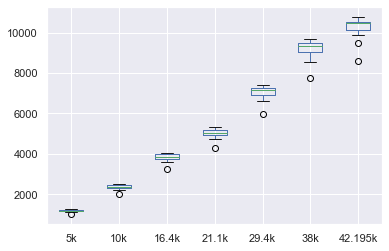

In [10]:
# Visualize the sub-3 table with a box plot
sub_three_boxplot = sub_three_df.plot.box(grid=True)
sub_three_boxplot.plot()
plt.show()

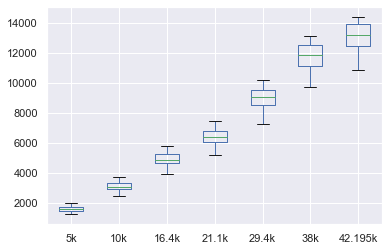

In [11]:
# Visualize the sub-4 table with a box plot
sub_three_boxplot = sub_four_df.plot.box(grid=True)
sub_three_boxplot.plot()
plt.show()

From here, I'm going refer to the 29.4k point as the pace separator because it's my point of interest in this study.

In [12]:
# Average speed until 29.4k in "second/km" among sub-3 runners
sub_three_before = sub_three_df['29.4k']/29.4

# Average speed after 29.4k in "second/km" among sub-3 runners
sub_three_after = (sub_three_df['42.195k']-sub_three_df['29.4k'])/(42.195-29.4)

In [13]:
# Average speed until 29.4k in "second/km" among sub-4 runners
sub_four_before = sub_four_df['29.4k']/29.4

# Average speed after 29,4k in "second/km" among sub-4 runners
sub_four_after = (sub_four_df['42.195k']-sub_four_df['29.4k'])/(42.195-29.4)

In [14]:
# Statistical test: comparing the before-and-after paces as dependant variables
from scipy import stats
stats.ttest_rel(sub_three_before, sub_three_after)

Ttest_relResult(statistic=-4.734548594370066, pvalue=6.216388697912961e-05)

In [15]:
stats.ttest_rel(sub_four_before, sub_four_after)

Ttest_relResult(statistic=-15.383378920964399, pvalue=9.901668088513279e-43)

## Conclusion

Both cases show extremely small p-values with far less than 0.01. P<0.01<α, therefore at 99% confidence level, I reject the Null Hyposis 1 and Null Hypothesis 2. ***Average running speed is significantly different before and after 29.4k both in sub-3 and sub-4 runners***.

## Average paces

Nontheless, even with a slower average speed for the last several kilometers in many cases, sub-3 runners still manage to run a full-marathon under 3 hours. So how fast did the sub-3 runners from Reykjavik Marathon 2019 run?

In [16]:
# Function to convert running time in seconds to min/km

def minute_per_km(seconds):
    m, s = divmod(np.mean(seconds), 60)
    m = round(m)
    s = round(s)
    if s < 10:
        text = str(m) + ":0" + str(s) + " min/km"
    else:
        text = str(m) + ":" + str(s) + " min/km"

    return text

In [17]:
minute_per_km(sub_three_before) # Incredible!

'4:00 min/km'

In [18]:
minute_per_km(sub_three_after) # Wow, still very fast!

'4:13 min/km'

In [19]:
minute_per_km(sub_four_before) # Not too bad!

'5:05 min/km'

In [20]:
minute_per_km(sub_four_after) # well, we might have slowed down, but we didn't give up!

'5:25 min/km'